## Pandas 4

In [60]:
from datetime import datetime
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### Problem 1

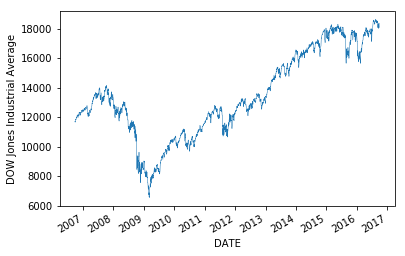

In [66]:
df = pd.read_csv('Data/DJIA.csv', index_col = 0, parse_dates = True)
df = pd.to_numeric(df.VALUE, errors = 'coerce')
df = df.dropna()
df.plot(lw = .5)
plt.ylabel("DOW Jones Industrial Average")
plt.show()


### Problem 2

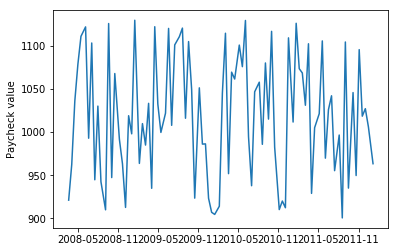

In [101]:
df = pd.read_csv('Data/paychecks.csv', squeeze = True)#, parse_dates = True)
#1st fris
fri1 = pd.date_range(start='2008/3/13', periods=100, freq='WOM-1FRI')
#3rd fris
fri3 = pd.date_range(start='2008/3/13', periods=100, freq='WOM-3FRI')
#union
allfri = fri1.union(fri3)
#truncate
allfri = allfri[:92]
df.index = allfri
plt.plot(df)
plt.ylabel('Paycheck value')
plt.show()

### Problem 3

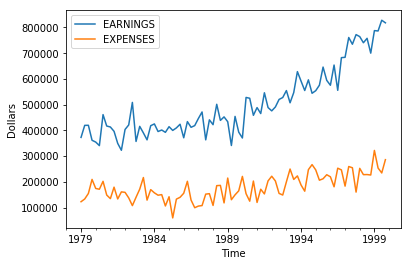

In [113]:
df = pd.read_csv('Data/finances.csv')
df.index = pd.period_range(start = "1979", periods = len(df) ,freq = "Q-DEC")
df.plot()
plt.ylabel("Dollars")
plt.xlabel("Time")
plt.show()

### Problem 4

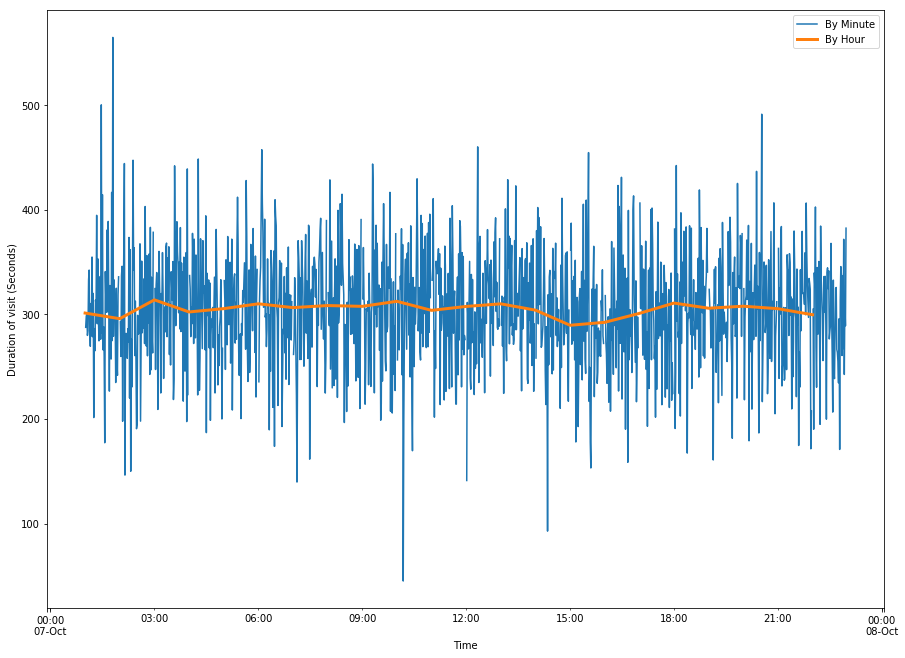

In [173]:
df = pd.read_csv('Data/website_traffic.csv')
df.ENTER, df.LEAVE = pd.to_datetime(df.ENTER), pd.to_datetime(df.LEAVE)
df['DURATION'] = (df.LEAVE - df.ENTER).dt.seconds
df.index = df.ENTER

fig, ax  =  plt.subplots(figsize=(15, 11))

df.resample('1min').mean().plot(ax = ax)
df.resample('H').mean().plot(ax = ax, lw=3)
plt.ylabel('Duration of visit (Seconds)')
plt.xlabel('Time')
plt.legend(['By Minute', 'By Hour'])
#dfmin = df.resample('1min')
#dfhr = df.resample('H')
#print(dfmin['DURATION'].mean())

### Problem 5

In [194]:
df = pd.read_csv('Data/DJIA.csv', index_col = 0, parse_dates = True)
df = pd.to_numeric(df.VALUE, errors = 'coerce')
df = df.dropna()
dfdiff = df - df.shift(1)
print("Day with the biggest gain is:", dfdiff.sort_values().index[-1])
print("Day with the biggest loss is:", dfdiff.sort_values().index[0])
# Reshape For Monthly
dfmo = df.resample('M').first()
dfmodiff = dfmo - dfmo.shift(1)
print("Month with the biggest gain is:", dfmodiff.sort_values().index[-1])
print("Month with the biggest loss is:", dfmodiff.sort_values().index[0])

Day with the biggest gain is: 2006-09-27 00:00:00
Day with the biggest loss is: 2008-09-29 00:00:00
Month with the biggest gain is: 2006-09-30 00:00:00
Month with the biggest loss is: 2015-09-30 00:00:00


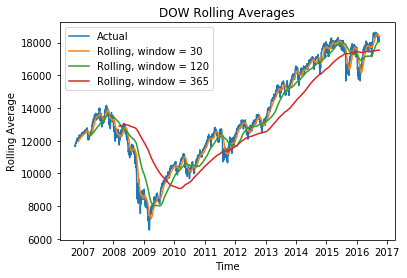

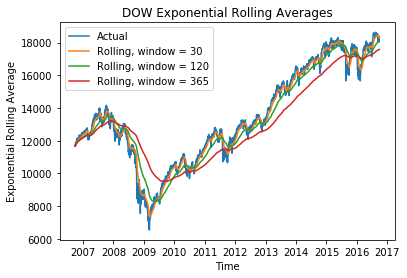

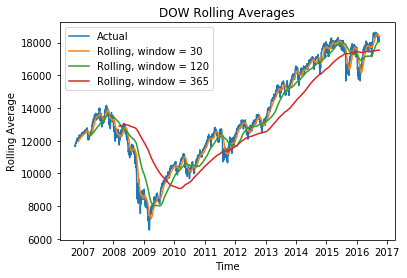

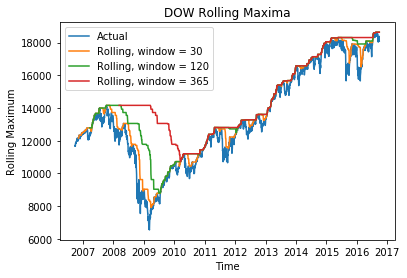

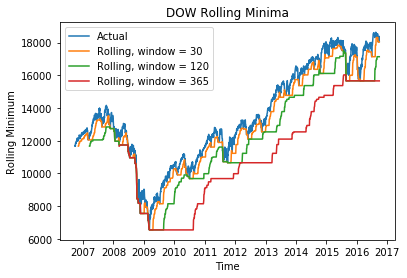

In [209]:
size = [30, 120, 365]
plt.plot(df, label = 'Actual')
for s in size:
    plt.plot(df.rolling(window=s).mean(), label = f"Rolling, window = {s}")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Rolling Average")
plt.title("DOW Rolling Averages")
plt.show()

plt.plot(df, label = 'Actual')
for s in size:
    plt.plot(df.ewm(span=s).mean(), label = f"Rolling, window = {s}")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Exponential Rolling Average")
plt.title("DOW Exponential Rolling Averages")
plt.show()

size = [30, 120, 365]
plt.plot(df, label = 'Actual')
for s in size:
    plt.plot(df.rolling(window=s).max(), label = f"Rolling, window = {s}")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Rolling Maximum")
plt.title("DOW Rolling Maxima")
plt.show()

plt.plot(df, label = 'Actual')
for s in size:
    plt.plot(df.rolling(window=s).min(), label = f"Rolling, window = {s}")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Rolling Minimum")
plt.title("DOW Rolling Minima")
plt.show()

As the window length increases, the tolling measures become smoother, but also track the data less closely.